## Data Collection

This dataset has 4 CSV files of the data records and each CSV file contains attack and normal records.
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>

<tr>
<td> UNSWNB15_1.csv </td>
<td> 165.02 MB </td>
<td> 700000 </td>
<td> 49 </td>
</tr>

<tr>
<td> UNSWNB15_2.csv </td>
<td> 161.349 MB </td>
<td> 700000 </td>
<td> 49 </td>
</tr>

<tr>
<td> UNSWNB15_3.csv </td>
<td> 150.965 MB </td>
<td> 700000 </td>
<td> 49 </td>
</tr>

<tr>
<td> UNSWNB15_4.csv </td>
<td> 95.302 MB </td>
<td> 440044 </td>
<td> 49 </td>
</tr>
</table>


## Features in the Dataset

This dataset has 49 features.
<br>
There are 3 different datatypes:
- Categorical: proto, state, service, attack_cat
- Binary: is_sm_ips_ports, is_ftp_login
- Numerical: Rest of the features

| #   | Feature             | Type      | Description                                                         |
| --- | ------------------- | --------- | ------------------------------------------------------------------- |
| 1   | srcip               | nominal   | Source IP address                                                   |
| 2   | sport               | integer   | Source port number                                                  |
| 3   | dstip               | nominal   | Destination IP address                                              |
| 4   | dsport              | integer   | Destination port number                                             |
| 5   | proto               | nominal   | Transaction protocol                                                |
| 6   | state               | nominal   | Indicates the state and its dependent protocol                      |
| 7   | dur                 | Float     | Record total duration                                               |
| 8   | sbytes              | Integer   | Source to destination transaction bytes                             |
| 9   | dbytes              | Integer   | Destination to source transaction bytes                             |
| 10  | sttl                | Integer   | Source to destination time to live value                             |
| 11  | dttl                | Integer   | Destination to source time to live value                            |
| 12  | sloss               | Integer   | Source packets retransmitted or dropped                             |
| 13  | dloss               | Integer   | Destination packets retransmitted or dropped                        |
| 14  | service             | nominal   | HTTP, FTP, SMTP, SSH, DNS, FTP-data, IRC, (-) if not much used service|
| 15  | Sload               | Float     | Source bits per second                                              |
| 16  | Dload               | Float     | Destination bits per second                                         |
| 17  | Spkts               | Integer   | Source to destination packet count                                  |
| 18  | Dpkts               | Integer   | Destination to source packet count                                  |
| 19  | swin                | Integer   | Source TCP window advertisement value                               |
| 20  | dwin                | Integer   | Destination TCP window advertisement value                          |
| 21  | stcpb               | Integer   | Source TCP base sequence number                                      |
| 22  | dtcpb               | Integer   | Destination TCP base sequence number                                  |
| 23  | smeansz             | Integer   | Mean of the flow packet size transmitted by the source              |
| 24  | dmeansz             | Integer   | Mean of the flow packet size transmitted by the destination         |
| 25  | trans_depth         | Integer   | Represents the pipelined depth into the connection of HTTP request/response transaction|
| 26  | res_bdy_len         | Integer   | Actual uncompressed content size of the data transferred from the server's HTTP service|
| 27  | Sjit                | Float     | Source jitter (mSec)                                                |
| 28  | Djit                | Float     | Destination jitter (mSec)                                           |
| 29  | Stime               | Timestamp | Record start time                                                   |
| 30  | Ltime               | Timestamp | Record last time                                                    |
| 31  | Sintpkt             | Float     | Source interpacket arrival time (mSec)                              |
| 32  | Dintpkt             | Float     | Destination interpacket arrival time (mSec)                         |
| 33  | tcprtt              | Float     | TCP connection setup round-trip time, the sum of 'synack' and 'ackdat'|
| 34  | synack              | Float     | TCP connection setup time, the time between the SYN and the SYN_ACK packets|
| 35  | ackdat              | Float     | TCP connection setup time, the time between the SYN_ACK and the ACK packets|
| 36  | is_sm_ips_ports     | Binary    | If source (1) and destination (3) IP addresses equal and port numbers (2)(4) equal then, this variable takes value 1 else 0|
| 37  | ct_state_ttl        | Integer   | No. for each state (6) according to a specific range of values for source/destination time to live (10) (11)|
| 38  | ct_flw_http_mthd    | Integer   | No. of flows that has methods such as Get and Post in HTTP service  |
| 39  | is_ftp_login        | Binary    | If the FTP session is accessed by user and password then 1 else 0    |
| 40  | ct_ftp_cmd          | Integer   | No. of flows that has a command in FTP session                       |
| 41  | ct_srv_src          | Integer   | No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26)|
| 42  | ct_srv_dst          | Integer   | No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26)|
| 43  | ct_dst_ltm          | Integer   | No. of connections of the same destination address (3) in 100 connections according to the last time (26)|
| 44  | ct_src_ltm          | Integer   | No. of connections of the same source address (1) in 100 connections according to the last time (26)|
| 45  | ct_src_dport_ltm    | Integer   | No. of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26)|
| 46  | ct_dst_sport_ltm    | Integer   | No. of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26)|
| 47  | ct_dst_src_ltm      | Integer   | No. of connections of the same source (1) and the destination (3) address in 100 connections according to the last time (26)|
| 48  | attack_cat          | nominal   | The name of each attack category                                    |
| 49  | Label               | binary    | 0 for normal and 1 for attack records                               |


## ML Problem Formulation


*Binary classification of attack category*

The dataset has "label" with 0 and 1 where 0 represents normal ( it's not attack) and 1 represent attack (anomaly) . So with the features available we will try to predict a given datapoint whether it belongs to attack or non-attack category.

# UNSW-NB15: Data cleaning and preprocessing


<H3>IMPORT MODUL

In [115]:
import pandas as pd  # for csv files and dataframe
import pickle  # To load data int disk
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import time
%matplotlib inline

<H1> Reading data

In [116]:
# Reading datasets
dfs = []
for i in range(1,5):
    path = 'Dataset/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
df = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single file name df

In [117]:
# Load features from NUSW-NB15_features.csv
df_features = pd.read_csv('Dataset/NUSW-NB15_features.csv',encoding="ISO-8859-1")

# Apply features to the dataset
df.columns = df_features['Name'].values


In [118]:
# Making column names lower case, removing spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [119]:
# train_test_split
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [120]:

df.shape


(2540047, 49)

In [121]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


<H1> pre-processing & Data cleaning

In [122]:
# print (X_train)
# print (y_train)
# print (X_test)
# print (y_test)
# Print Null values in X_train


In [123]:
print("Total Null values in X_train before filter:", X_train.isnull().sum().sum())


Total Null values in X_train before filter: 4497854


In [124]:
# Print Null values in X_train
print(X_train.isnull().sum())

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

In [125]:
X_train['attack_cat'].value_counts()

attack_cat
Generic             193696
Exploits             40112
 Fuzzers             17358
DoS                  14723
 Reconnaissance      11025
 Fuzzers              4562
Analysis              2400
Backdoor              1617
Reconnaissance        1599
 Shellcode            1167
Backdoors              486
Shellcode              192
Worms                  156
Name: count, dtype: int64

In [126]:
X_train['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0.0     887846
1.0     169321
6.0       7078
4.0       5909
3.0        651
2.0        518
5.0        388
9.0        247
14.0       201
12.0       111
30.0        51
8.0         47
16.0        41
36.0        32
10.0        28
25.0        21
Name: count, dtype: int64

In [127]:
X_train['is_ftp_login'].value_counts()

is_ftp_login
0.0    959511
1.0     39008
4.0       144
2.0        26
Name: count, dtype: int64

In [128]:
# Fill null values in attack_cat column with 'normal'
X_train['attack_cat'] = X_train['attack_cat'].fillna('normal')
X_test['attack_cat'] = X_test['attack_cat'].fillna('normal')

# Fill null values in ct_flw_http_mthd column with 0
X_train['ct_flw_http_mthd'] = X_train['ct_flw_http_mthd'].fillna(0)
X_test['ct_flw_http_mthd'] = X_test['ct_flw_http_mthd'].fillna(0)

# Fill null values in is_ftp_login column with 0
X_train['is_ftp_login'] = X_train['is_ftp_login'].fillna(0)
X_test['is_ftp_login'] = X_test['is_ftp_login'].fillna(0)

In [129]:
# check null values in X_train
print("Total Null values in X_train after filter:", X_train.isnull().sum().sum())


Total Null values in X_train after filter: 0


In [130]:
print("X_train shape before high corr filter:", X_train.shape)

X_train shape before high corr filter: (2286042, 48)


In [131]:
on_numeric_columns = X_train.select_dtypes(exclude='number').columns
non_numeric_columns = X_test.select_dtypes(exclude='number').columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object')


<H1>Encoding

In [132]:
X_train['dsport'] = X_train['dsport'].astype(str)
X_train['dsport'].fillna('missing', inplace=True)  # Replace NaN with a placeholder value
X_train = X_train.dropna(subset=['dsport'])
X_train['ct_ftp_cmd'] = X_train['ct_ftp_cmd'].astype(str)
X_train['srcip'] = X_train['srcip'].astype(str)

X_test['ct_ftp_cmd'] = X_test['ct_ftp_cmd'].astype(str)
X_test['srcip'] = X_test['srcip'].astype(str)
X_test['dsport'] = X_test['dsport'].astype(str)
X_test['dsport'].fillna('missing', inplace=True)  # Replace NaN with a placeholder value
X_test = X_test.dropna(subset=['dsport'])

# Assuming 'X_train' is your DataFrame
le = LabelEncoder()


# Now apply the LabelEncoder
X_train['ct_ftp_cmd'] = le.fit_transform(X_train['ct_ftp_cmd'])
X_test['ct_ftp_cmd'] = le.fit_transform(X_test['ct_ftp_cmd'])
X_train['srcip'] = le.fit_transform(X_train['srcip'])
X_test['srcip'] = le.fit_transform(X_test['srcip'])
# Convert the 'sport' column to strings
X_train['sport'] = X_train['sport'].astype(str)
X_test['sport'] = X_test['sport'].astype(str)
# Now, you can use LabelEncoder on the 'sport' column
X_train['sport'] = le.fit_transform(X_train['sport'])
X_train['dsport'] = le.fit_transform(X_train['dsport'])
X_test['sport'] = le.fit_transform(X_test['sport'])
X_test['dsport'] = le.fit_transform(X_test['dsport'])

# Repeat for other columns...

X_train['dstip'] = le.fit_transform(X_train['dstip'])
X_train['dsport'] = le.fit_transform(X_train['dsport'])
X_train['proto'] = le.fit_transform(X_train['proto'])
X_train['state'] = le.fit_transform(X_train['state'])
X_train['service'] = le.fit_transform(X_train['service'])
X_train['ct_ftp_cmd'] = le.fit_transform(X_train['ct_ftp_cmd'])
X_train['attack_cat'] = le.fit_transform(X_train['attack_cat'])
X_train['dstip'] = le.fit_transform(X_train['dstip'])

X_test['dstip'] = le.fit_transform(X_test['dstip'])
X_test['dsport'] = le.fit_transform(X_test['dsport'])
X_test['proto'] = le.fit_transform(X_test['proto'])
X_test['state'] = le.fit_transform(X_test['state'])
X_test['service'] = le.fit_transform(X_test['service'])
X_test['ct_ftp_cmd'] = le.fit_transform(X_test['ct_ftp_cmd'])
X_test['attack_cat'] = le.fit_transform(X_test['attack_cat'])



In [133]:
non_numeric_columns = X_train.select_dtypes(exclude='number').columns
print(f"Non-numeric columns: {non_numeric_columns}")
non_numeric_columns = X_test.select_dtypes(exclude='number').columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index([], dtype='object')
Non-numeric columns: Index([], dtype='object')


<H2>Training And Clasification (before and after Filter High Correlation)



<H3> Before Filter High Correlation

In [136]:
corr_mat = X_train.corr(method='pearson')
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"High corr: {columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

High corr: sbytes               sloss                0.9544266892460995
High corr: dbytes               dloss                0.9913052585818809
High corr: dbytes               dpkts                0.9706287326945696
High corr: sttl                 ct_state_ttl         0.9059574874443663
High corr: dloss                dpkts                0.9920944071571861
High corr: swin                 dwin                 0.9972098797520872
High corr: stime                ltime                0.9999999997825213
High corr: tcprtt               synack               0.9297052338631611
High corr: tcprtt               ackdat               0.9186177806539728
High corr: ct_srv_src           ct_srv_dst           0.9567382933002961
High corr: ct_srv_src           ct_dst_src_ltm       0.942191554375676
High corr: ct_srv_dst           ct_dst_src_ltm       0.9509948411308352
High corr: ct_dst_ltm           ct_src__ltm          0.9385080233831757
High corr: ct_dst_ltm           ct_src_dport_ltm     0.9601365848

In [137]:
print("X_train shape before high corr filter:", X_train.shape)

X_train shape before high corr filter: (2286042, 48)


In [138]:
print(f"Data before scaling:\n{X_train}")

Data before scaling:
         srcip  sport  dstip  dsport  proto  state       dur  sbytes  dbytes  \
282001      37  34830      9   47340    120      2  0.001097     146     178   
336847      36  61619     26   26636    114      5  0.004232     528    8824   
1362417     28  18499     10    3845    114      5  0.777348     588     354   
218834      35  19412     24   48764    120      2  0.001681     528     304   
1203820     12    453     28   47340    120      6  0.000010     264       0   
...        ...    ...    ...     ...    ...    ...       ...     ...     ...   
2249467     14    453     29   47340    120      6  0.000009     264       0   
963395      34  25616      8   46128    114      5  0.426193    2054    2478   
2215104     31  48738     19   37974    114      5  0.667889    1058     766   
1484405     41   6632      8   14868    114      5  0.041776    3302   37162   
305711      37  31728     21   32567    114      5  0.028309    4014   57706   

         sttl  ...

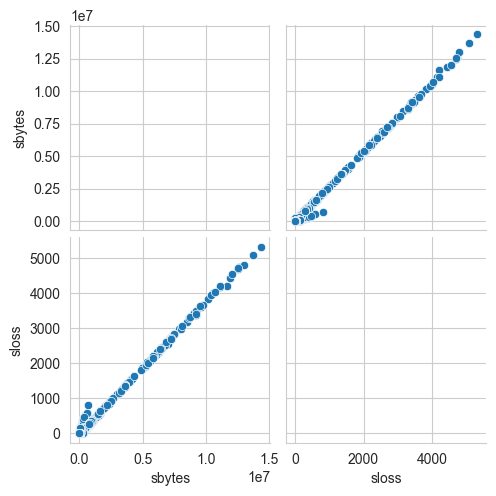

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src__ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat'],
      dtype='object')


In [139]:
sns.set_style("whitegrid")
sns.pairplot(data=X_train, vars=['sbytes', 'sloss'])
plt.show()  


print(X_train.columns)

<H5>Random Forest 

In [140]:
# Train Random Forest classifier
start_time = time.time()
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
random_forest_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time taken (Random Forest): ", end_time - start_time)

# Save the trained model to a pickle file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(random_forest_clf, model_file)
print(f"Random Forest model saved as {model_filename}")
start_time = time.time()
# Test and get accuracy, precision, recall
y_pred = random_forest_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Training time taken (Random Forest):  97.55358958244324
Random Forest model saved as random_forest_model.pkl
Accuracy: 0.9978740575972914
Precision: 0.9978976083695951
Recall: 0.9978740575972914
Confusion Matrix:
[[221337    478]
 [    62  32128]]


<H5>DecisionTree

In [141]:
# Train Decision Tree classifier
start_time = time.time()
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time taken (Decision Tree): ", end_time - start_time)

# Save the trained model to a pickle file
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(decision_tree_clf, model_file)
print(f"Decision Tree model saved as {model_filename}")

# Test and get accuracy, precision, recall
y_pred = decision_tree_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Training time taken (Decision Tree):  4.814631700515747
Decision Tree model saved as decision_tree_model.pkl
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[221815      0]
 [     0  32190]]


<H3> After Filter High Correlation

In [142]:
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            # Dropping high correlation features
            if columns[j] in X_train.columns:
                X_train = X_train.drop(columns=[columns[j]])
                print(f"drop X_train: {columns[j]:20s}")
            
            if columns[j] in X_test.columns:
                X_test = X_test.drop(columns=[columns[j]])
                print(f"drop X_test: {columns[j]:20s}")

drop X_train: sloss               
drop X_test: sloss               
drop X_train: dloss               
drop X_test: dloss               
drop X_train: dpkts               
drop X_test: dpkts               
drop X_train: ct_state_ttl        
drop X_test: ct_state_ttl        
drop X_train: dwin                
drop X_test: dwin                
drop X_train: ltime               
drop X_test: ltime               
drop X_train: synack              
drop X_test: synack              
drop X_train: ackdat              
drop X_test: ackdat              
drop X_train: ct_srv_dst          
drop X_test: ct_srv_dst          
drop X_train: ct_dst_src_ltm      
drop X_test: ct_dst_src_ltm      
drop X_train: ct_src__ltm         
drop X_test: ct_src__ltm         
drop X_train: ct_src_dport_ltm    
drop X_test: ct_src_dport_ltm    
drop X_train: ct_dst_sport_ltm    
drop X_test: ct_dst_sport_ltm    


In [143]:
print("X_train shape before high corr filter:", X_train.shape)

X_train shape before high corr filter: (2286042, 35)


In [144]:
print(f"Data after scaling:\n{X_train}")

Data after scaling:
         srcip  sport  dstip  dsport  proto  state       dur  sbytes  dbytes  \
282001      37  34830      9   47340    120      2  0.001097     146     178   
336847      36  61619     26   26636    114      5  0.004232     528    8824   
1362417     28  18499     10    3845    114      5  0.777348     588     354   
218834      35  19412     24   48764    120      2  0.001681     528     304   
1203820     12    453     28   47340    120      6  0.000010     264       0   
...        ...    ...    ...     ...    ...    ...       ...     ...     ...   
2249467     14    453     29   47340    120      6  0.000009     264       0   
963395      34  25616      8   46128    114      5  0.426193    2054    2478   
2215104     31  48738     19   37974    114      5  0.667889    1058     766   
1484405     41   6632      8   14868    114      5  0.041776    3302   37162   
305711      37  31728     21   32567    114      5  0.028309    4014   57706   

         sttl  ... 

<H5>Random Forest

In [145]:
# Train Random Forest classifier
start_time = time.time()
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
random_forest_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time taken (Random Forest): ", end_time - start_time)

# Save the trained model to a pickle file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(random_forest_clf, model_file)
print(f"Random Forest model saved as {model_filename}")
start_time = time.time()
# Test and get accuracy, precision, recall
y_pred = random_forest_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Training time taken (Random Forest):  94.5002224445343
Random Forest model saved as random_forest_model.pkl
Accuracy: 0.9981220842109407
Precision: 0.9981495053341348
Recall: 0.9981220842109407
Confusion Matrix:
[[221338    477]
 [     0  32190]]


<H5>DecisionTree

In [146]:
# Train Decision Tree classifier
start_time = time.time()
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
end_time = time.time()
print("Training time taken (Decision Tree): ", end_time - start_time)

# Save the trained model to a pickle file
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(decision_tree_clf, model_file)
print(f"Decision Tree model saved as {model_filename}")

# Test and get accuracy, precision, recall
y_pred = decision_tree_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Training time taken (Decision Tree):  4.1377081871032715
Decision Tree model saved as decision_tree_model.pkl
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[221815      0]
 [     0  32190]]


<H1>LOAD MODEL

Random Forest

In [147]:
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
# Now, you can use the loaded_model for predictions
loaded_y_pred = loaded_model.predict(X_test)

Decision Tree

In [148]:
# Load the saved model
with open('decision_tree_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
# Now, you can use the loaded_model for predictions
loaded_y_pred = loaded_model.predict(X_test)